## Part 1: Parse the Data to CSV

### Load Packages

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
from numpy import linspace
import scipy.signal as signal
from numpy.linalg import svd
import pickle

### Parse imzML file
We parsed the data for you so that you do not have to import ImzMLParser

In [9]:
from pyimzml.ImzMLParser import ImzMLParser
mzml_file = r"C:\Users\John\programming\CS532-Project-Folder-2\data\Restenosis Files From Jill\imzmLs\Control_Day03_01.imzML"
p = ImzMLParser(mzml_file)
out = []
for idx, (x,y,z) in enumerate(p.coordinates):
    mzs, intensities = p.getspectrum(idx)
    entry = {
        "idx": idx,
        "x": x,
        "y": y,
        "z": z,
        "mzs": mzs,
        "intensities": intensities
    }
    out.append(entry)
with open(r'imzml_array_pickle', 'xb') as writefile:
    pickle.dump(out, writefile)

### Read Parsed Data
Read the pickle

In [10]:
# READ THE DATA
with open('imzml_array_pickle', 'rb') as readfile:
    imzml_array = pickle.loads(readfile.read())

In [11]:
imzml_array[:2]

[{'idx': 0,
  'x': 1,
  'y': 1,
  'z': 1,
  'mzs': array([450.03807857, 450.04168529, 450.04529206, ..., 999.29577255,
         999.3077064 , 999.31964046]),
  'intensities': array([  1387.8757,  25358.361 , 112815.52  , ...,   6478.506 ,
           4609.9204,   1659.3208], dtype=float32)},
 {'idx': 1,
  'x': 2,
  'y': 1,
  'z': 1,
  'mzs': array([450.03808016, 450.04168688, 450.04529364, ..., 998.46092819,
         998.47284709, 998.4847662 ]),
  'intensities': array([1.1044678e+01, 1.2092739e+04, 6.2922770e+04, ..., 4.5055303e+03,
         4.1384688e+03, 3.4189351e+03], dtype=float32)}]

### Store Pertinent Data (m/z and intensity values) to CSV

In [12]:
# mzs are masses over charge of 1 ion
mass_data = [x['mzs'] for x in imzml_array]
# intensities correspond to the abundance of the particular ion
intensity_data = [x['intensities'] for x in imzml_array]

mass_df = pd.DataFrame(mass_data)
intensity_df = pd.DataFrame(intensity_data)

In [13]:
mass_df.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,450.038079,450.041685,450.045292,450.048899,450.052506,450.056113,450.059720,450.063327,450.066934,450.070541,...,998.460934,998.472853,998.484772,998.496691,999.259972,999.271905,999.283839,999.295773,999.307706,999.319640
1,450.038080,450.041687,450.045294,450.048900,450.052507,450.056114,450.059721,450.063328,450.066935,450.070542,...,996.449696,996.461579,996.473462,996.485346,996.497229,998.437091,998.449010,998.460928,998.472847,998.484766
2,450.038089,450.041695,450.045302,450.048909,450.052516,450.056123,450.059730,450.063337,450.066944,450.204042,...,998.472708,998.484627,998.496547,998.508466,999.438848,999.450784,999.462721,999.474658,999.486595,999.498532
3,450.038088,450.041695,450.045302,450.048909,450.052516,450.056122,450.059729,450.063336,450.066943,450.070550,...,999.391105,999.403040,999.414976,999.426912,999.438848,999.450785,999.462721,999.474658,999.486595,999.498533
4,450.005630,450.041695,450.045302,450.048909,450.052516,450.056123,450.059730,450.063337,450.066944,450.070551,...,998.472708,998.484627,998.496547,998.508466,998.520386,999.450784,999.462721,999.474658,999.486595,999.498532


In [14]:
intensity_df.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1387.875732,25358.361328,112815.523438,240930.015625,336226.500000,329734.000000,226525.093750,100804.023438,22066.628906,1011.050781,...,3974.469727,4702.808594,4346.023926,3094.546875,2035.125732,4185.840332,6227.437012,6478.505859,4609.920410,1659.320801
1,11.044678,12092.739258,62922.769531,145925.093750,216248.640625,223588.656250,162137.125000,76846.609375,18105.419922,2291.441406,...,2677.597656,4992.521973,5158.301270,3529.535156,1811.629761,2983.625000,4279.887207,4505.530273,4138.468750,3418.935059
2,1525.635742,7342.289062,34101.585938,73694.078125,102227.031250,98717.906250,65992.039062,27683.210938,4751.997070,2319.417969,...,10980.992188,9102.923828,4412.931152,273.593262,1663.298340,3176.518555,5999.912598,7195.569336,5308.344238,1842.819824
3,2326.619629,15235.981445,71735.226562,147905.453125,197072.578125,183360.359375,118110.148438,47896.906250,8758.249023,272.629272,...,3523.450684,3629.473145,3577.541016,3367.595703,3454.870117,4545.080078,5625.146484,5191.766113,3335.844238,1370.644043
4,0.000000,9326.431641,42918.273438,92284.445312,128883.828125,125852.195312,85212.406250,35980.878906,5354.890625,466.739502,...,12048.262695,10651.557617,6799.022461,3095.232666,1607.864014,2766.326172,5046.158203,5987.459961,4467.017578,1654.494629


In [15]:
mass_df.to_csv('Control_Day03_01_mass.csv')
intensity_df.to_csv('Control_Day03_01_intensities.csv')

## 2. Extract Features from Raw CSV

### Read CSV

In [37]:
def read_data():
    df_intensities = pd.read_csv('Control_Day03_01_intensities.csv')
    df_mass = pd.read_csv('Control_Day03_01_mass.csv')
    return df_mass, df_intensities
def idxs_to_bool(idxs, length=None):
    length = length or idxs[-1]+1
    ret = np.zeros(length,dtype=bool)
    for idx in idxs:
        ret[idx] = True;
    return ret

import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1
        
    block = int(round(bar_length * progress))
    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)


In [38]:
# READ THE DATA
df_mass, df_intensities = read_data()
# GET NUMBER OF PIXELS, NOTE COLUMN VECTORS ARE FEATURES (IE PIXELS)
pixel_count = len(df_mass.columns)
master_df = pd.DataFrame()

In [43]:
df_mass.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,450.038079,450.041685,450.045292,450.048899,450.052506,450.056113,450.059720,450.063327,450.066934,...,998.460934,998.472853,998.484772,998.496691,999.259972,999.271905,999.283839,999.295773,999.307706,999.319640
1,1,450.038080,450.041687,450.045294,450.048900,450.052507,450.056114,450.059721,450.063328,450.066935,...,996.449696,996.461579,996.473462,996.485346,996.497229,998.437091,998.449010,998.460928,998.472847,998.484766
2,2,450.038089,450.041695,450.045302,450.048909,450.052516,450.056123,450.059730,450.063337,450.066944,...,998.472708,998.484627,998.496547,998.508466,999.438848,999.450784,999.462721,999.474658,999.486595,999.498532
3,3,450.038088,450.041695,450.045302,450.048909,450.052516,450.056122,450.059729,450.063336,450.066943,...,999.391105,999.403040,999.414976,999.426912,999.438848,999.450785,999.462721,999.474658,999.486595,999.498533
4,4,450.005630,450.041695,450.045302,450.048909,450.052516,450.056123,450.059730,450.063337,450.066944,...,998.472708,998.484627,998.496547,998.508466,998.520386,999.450784,999.462721,999.474658,999.486595,999.498532


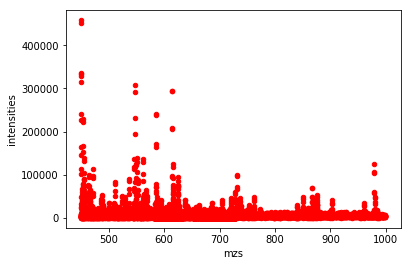

In [54]:
del df_mass['Unnamed: 0']
del df_intensities['Unnamed: 0']
plot_df  = pd.DataFrame({"mzs": df_mass.iloc[0,:].values, "intensities": df_intensities.iloc[0, :].values})
plot_df.plot(kind='scatter',x='mzs',y='intensities',color='red')

In [52]:
df_mass.iloc[0, :].max()

999.3196404603433

In [55]:
for i in range(pixel_count - 1):
    update_progress(i / (pixel_count-1))
    pixel_x = df_mass[str(i)].values
    pixel_y = df_intensities[str(i)].values
    # PUT X AND Y INTO A 2 COLUMN MATRIX
    df_train = pd.DataFrame({'mzs': pixel_x, 'intensities': pixel_y})
    # FIND NUMBER OF PEAKS, RETURNS THE INDEX OF VALUE MZS
    peaks = signal.find_peaks(pixel_y, height=500)
    # GET THE REDUCED DATA SET, FILTER BY PEAK INDICES
    df_train = df_train[idxs_to_bool(peaks[0], len(pixel_y))]
    df_train['pixel_id'] = i
    master_df = master_df.append(df_train, ignore_index=True)

Progress: [####################] 100.0%


In [59]:
master_df = master_df.sort_values('mzs')
number_of_bins = 250
min_mzs = 450
max_mzs = 1000
bins = linspace(min_mzs, max_mzs, number_of_bins)
col_set = list(range(pixel_count - 1))

aggregated_df = pd.DataFrame(columns=list(bins))

In [61]:
# for i in col_set:
#     update_progress(i / len(col_set))
#     curr_pixel = master_df[master_df['pixel_id'] == i]
#     pixel_binned = {}
#     for index in range(1, len(bins)):
#         lower_bound = bins[index - 1]
#         upper_bound = bins[index]
#         curr_bin = curr_pixel[curr_pixel['mzs'].between(lower_bound, upper_bound)]
#         bin_intensity = curr_bin['intensities'].sum()
#         pixel_binned[lower_bound] = bin_intensity
#     temp = pd.DataFrame([pixel_binned])
#     aggregated_df = aggregated_df.append(temp)
# aggregated_df.to_csv('csvData/aggregated_feature_table_{dataset_type}.csv'.format(dataset_type=dataset_type))